In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

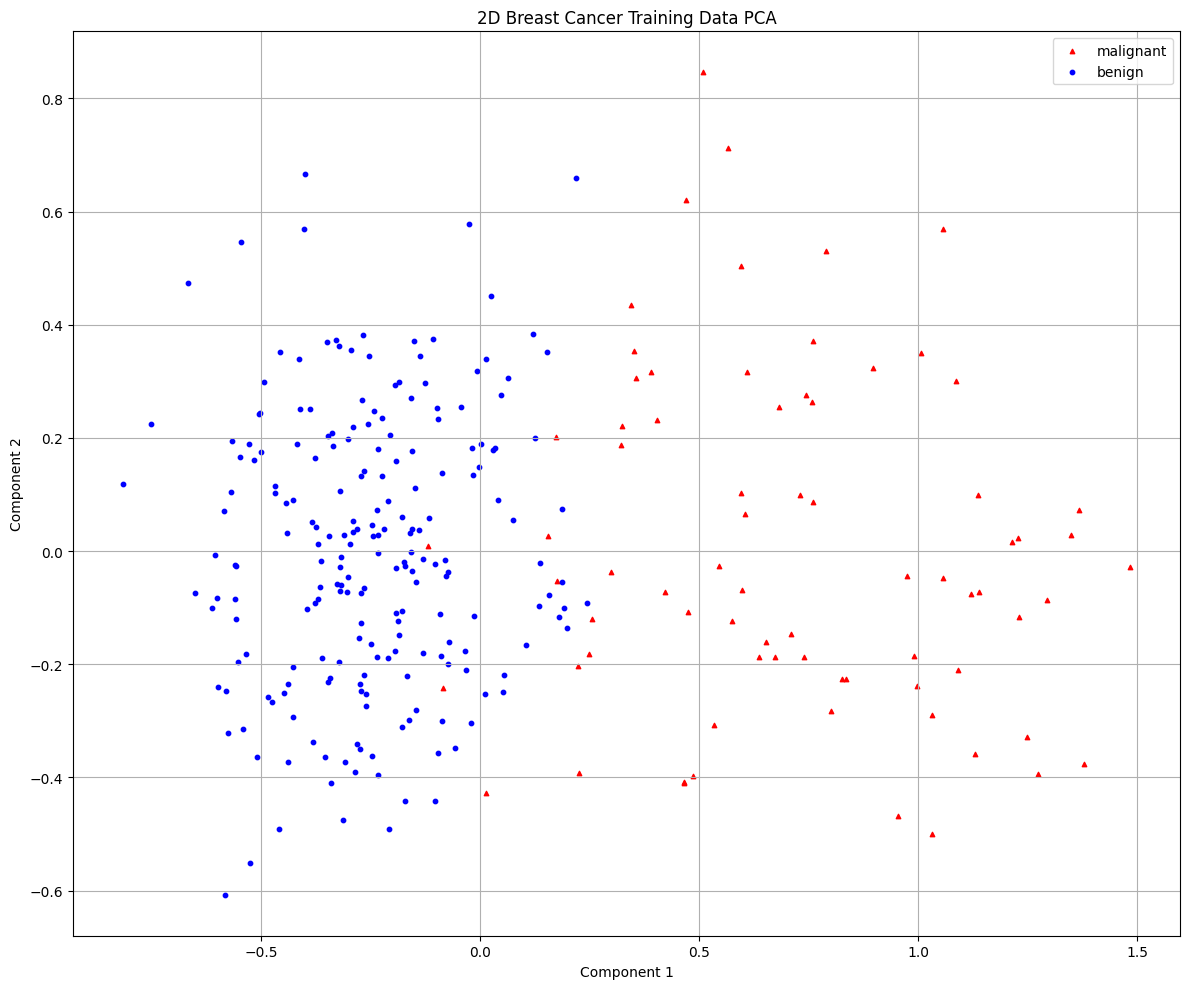

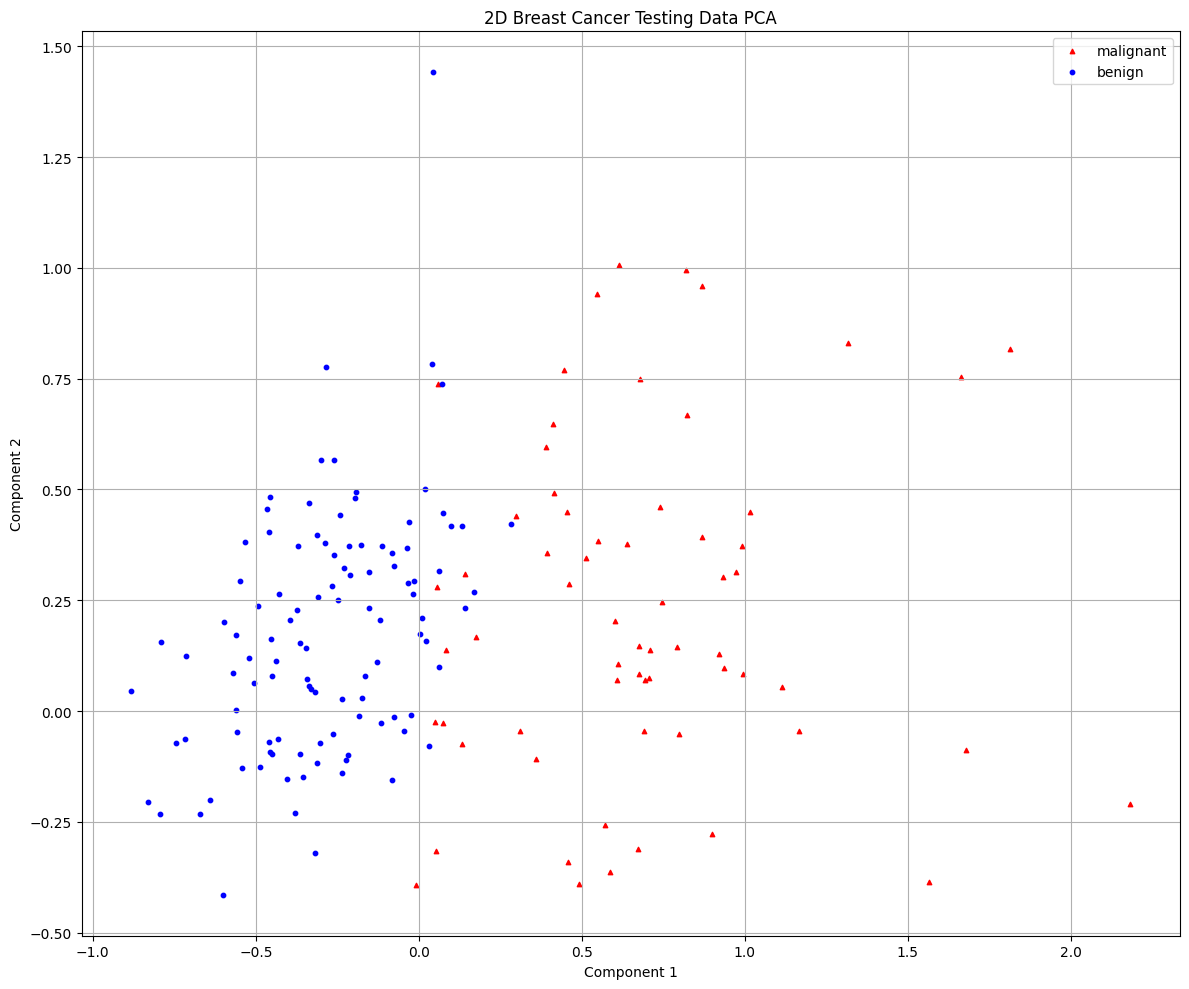

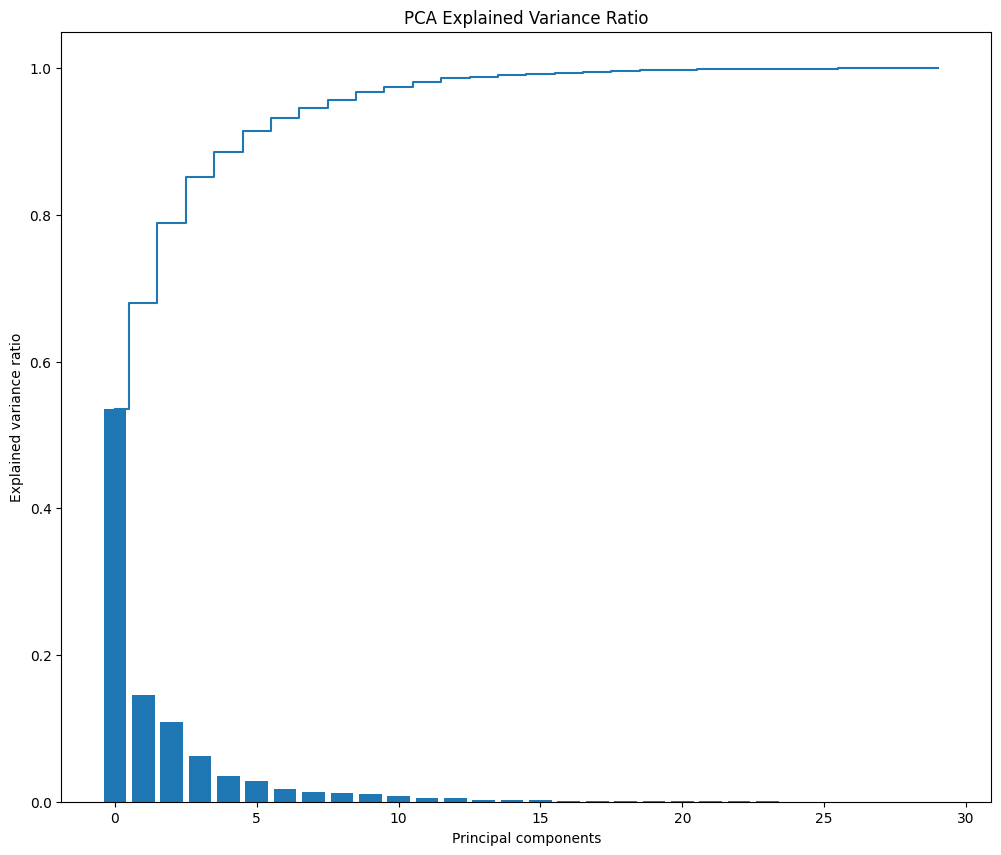

In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'dbscan', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {})

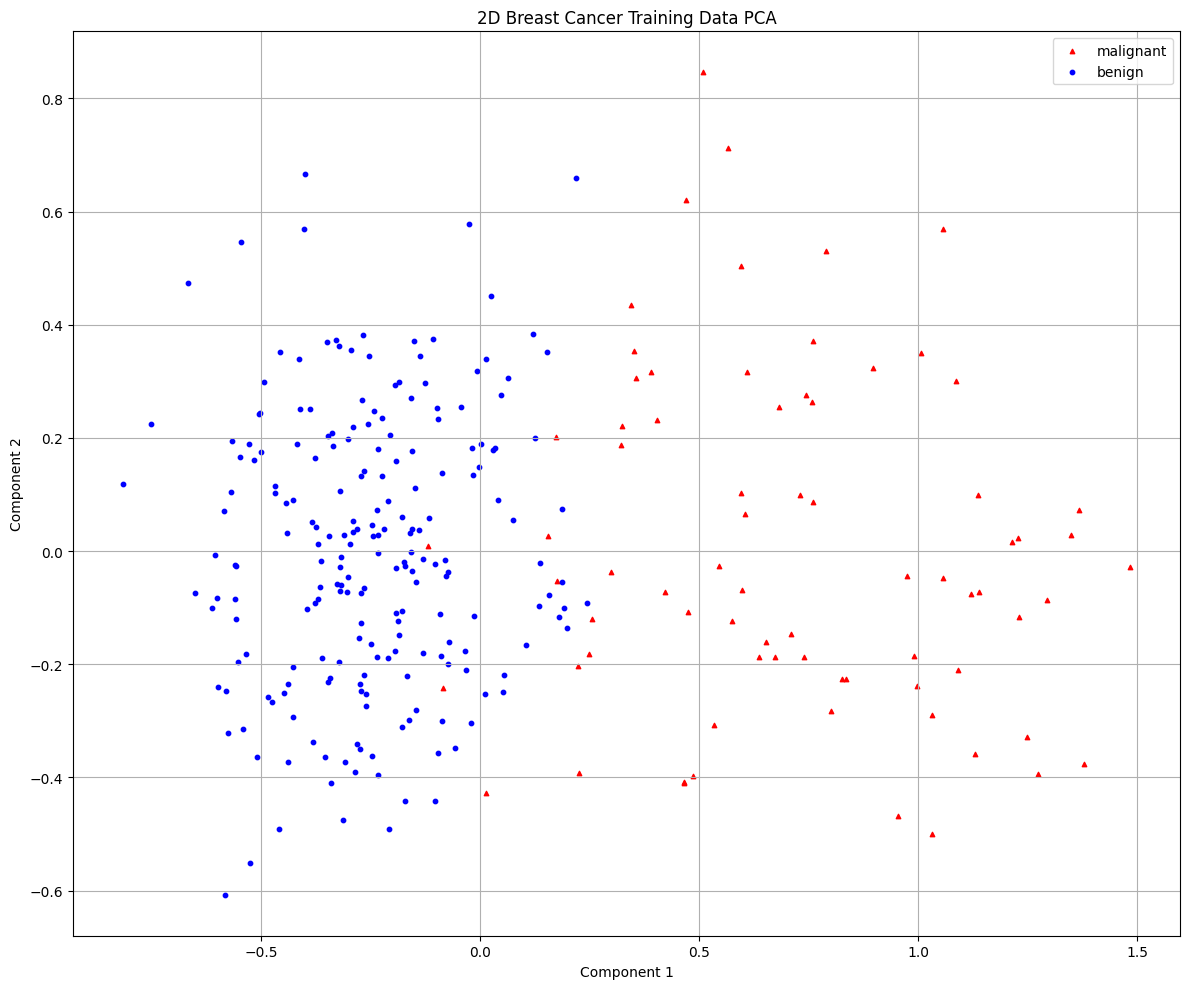

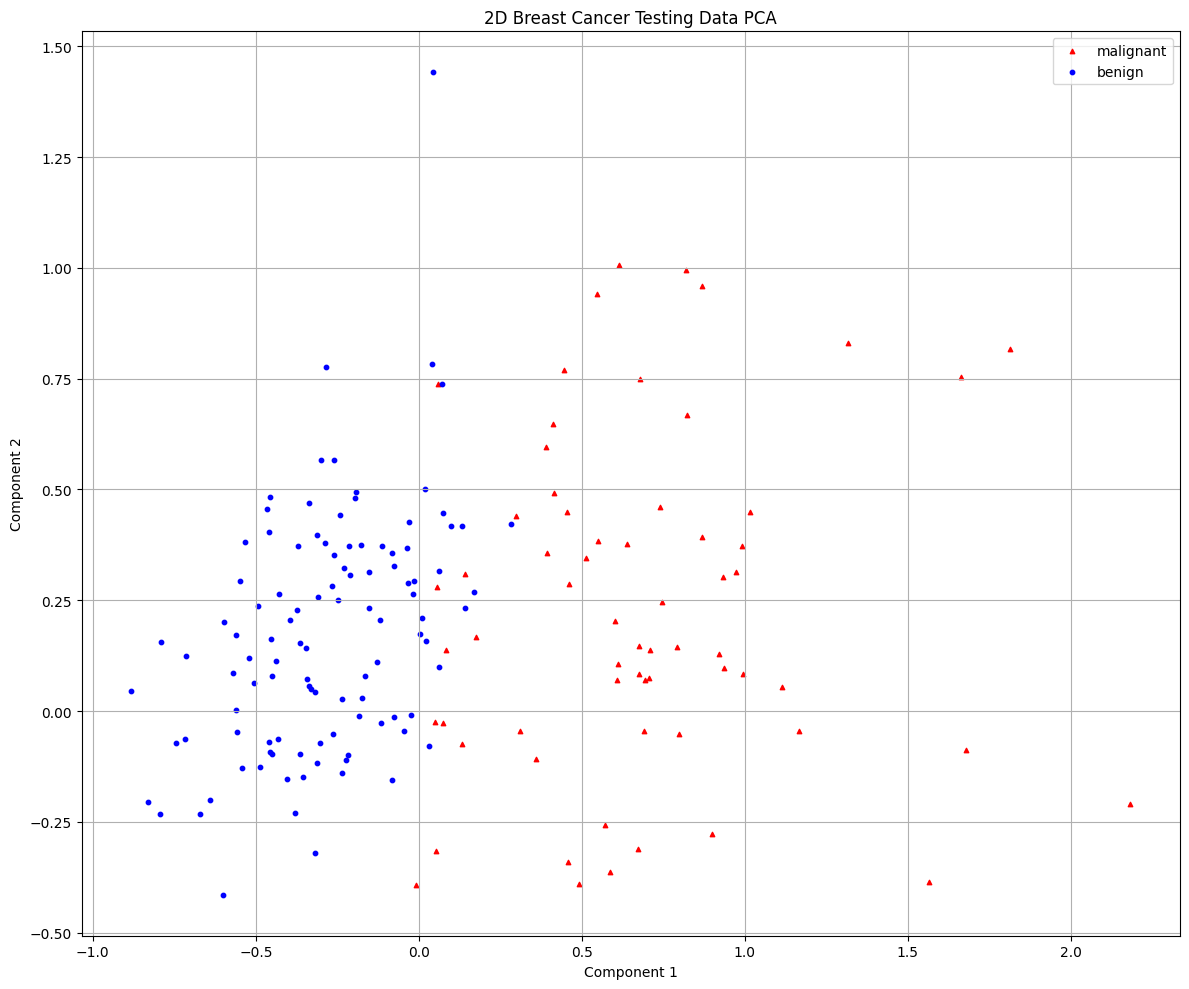

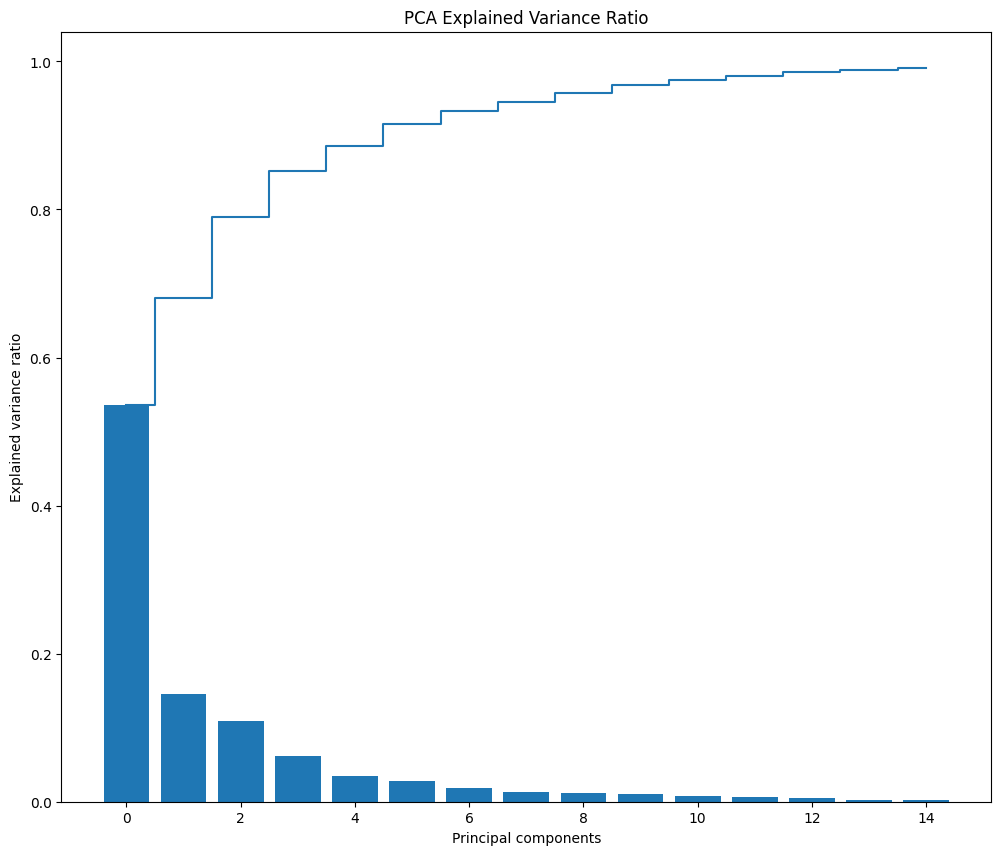

[I 2025-04-27 10:21:03,988] A new study created in memory with name: no-name-5c5f0b1b-376c-4405-a438-337c56dd4f14
[I 2025-04-27 10:21:06,848] Trial 0 finished with value: 0.9721113127646703 and parameters: {'n_estimators': 780, 'max_depth': 7, 'min_samples_split': 11, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.9721113127646703.
[I 2025-04-27 10:21:10,461] Trial 1 finished with value: 0.9651542649727768 and parameters: {'n_estimators': 997, 'max_depth': 19, 'min_samples_split': 17, 'min_samples_leaf': 16}. Best is trial 0 with value: 0.9721113127646703.
[I 2025-04-27 10:21:12,019] Trial 2 finished with value: 0.9685420447670902 and parameters: {'n_estimators': 385, 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.9721113127646703.
[I 2025-04-27 10:21:13,683] Trial 3 finished with value: 0.9616454930429521 and parameters: {'n_estimators': 410, 'max_depth': 22, 'min_samples_split': 11, 'min_samples_leaf': 18}. Best is trial 0 with v

Best trial:
Accuracy: 0.9723532970356927
Best hyperparameters:  {'n_estimators': 731, 'max_depth': 16, 'min_samples_split': 20, 'min_samples_leaf': 13}


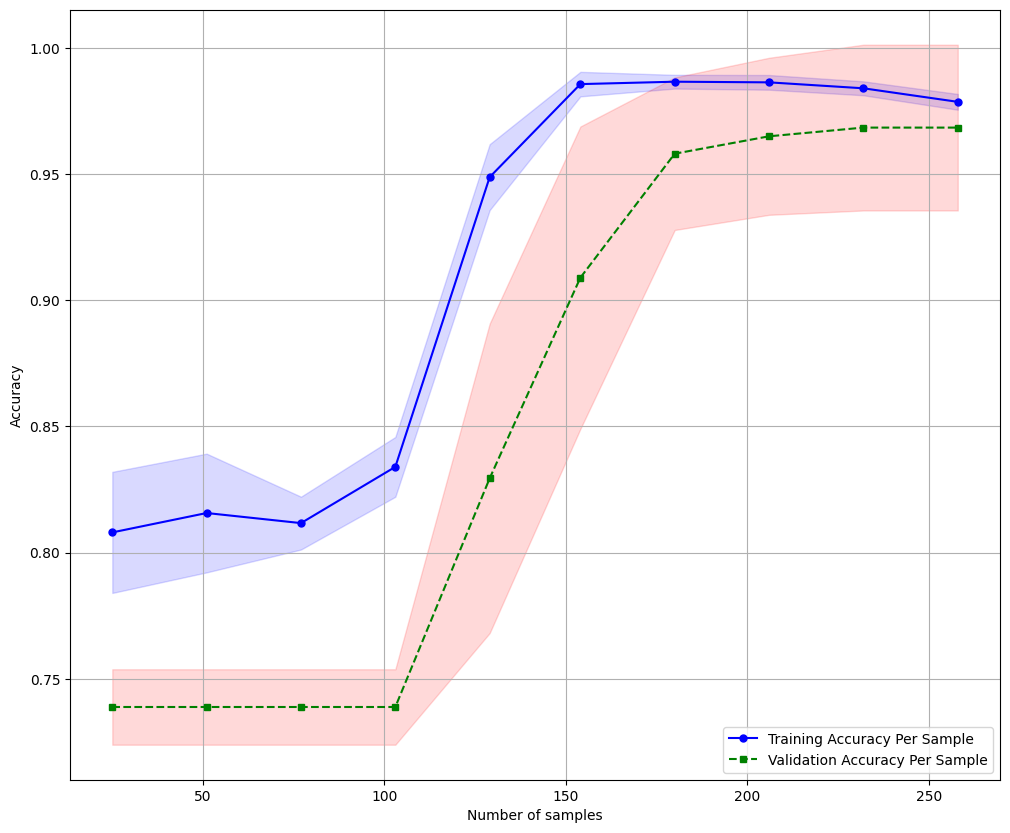

Confusion Matrix
[[ 54  10]
 [  1 106]]
Accuracy: 0.9357, Precision: 0.9138, Recall: 0.9907, F1: 0.9507, AUC: 0.9724


In [3]:
X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {'n_components': 15})
helper.train_and_evaluate_model('rf', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)